In [1]:
import numpy as np  # To load numpy
import pandas as pd # To load pandas
from sklearn.model_selection import train_test_split  # for split arrays or matrices into random train and test subsets
from sklearn import metrics   # importing metrics from sklearn to findout the performance measures.
import sklearn.preprocessing as preprocessing
import time
from sklearn import datasets
%matplotlib inline
import sklearn.preprocessing as preprocessing #Importing preprocess algorithm
from sklearn.svm import SVC

In [2]:
#Download the data fro "https://www.kaggle.com/uciml/breast-cancer-wisconsin-data?select=data.csv"
#Load the dataset 
bc = datasets.load_breast_cancer()
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
bc

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
# For easy  manipulation, convert dataset to pandas dataframe
bcdf = pd.DataFrame(bc.data, columns= bc.feature_names)

In [5]:
bcdf

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
# Append dataframe containing tumor features with diagnostic outcomes.
bcdf['Diagnosis'] = bc.target

In [7]:
# Quick check on dataset
bcdf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
# Quick glimpse of tumor features in relation to diagnosis
bcdf.groupby('Diagnosis').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Diagnosis,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [9]:
# For differential diagnosis visual comparisons.
# create to dataframes - one for positive, zero for negative
# 0 - bening(Benign refers to a condition, tumor, or growth that is not cancerous)
# 1 - malignant(Malignant refers to cancer cells that can invade and kill nearby tissue and spread to other parts of your body)
bcdf.head()
bcdf_b = bcdf[bcdf['Diagnosis'] == 0]
bcdf_m = bcdf[bcdf['Diagnosis'] == 1]

# Create list of features related to mean tumor characteristics
features_means =list(bcdf.columns[0:10])

In [10]:
bcdf_b.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
bcdf_m.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1


In [12]:
corr = bcdf.corr() #correlation plot
corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [13]:
corr.shape

(31, 31)

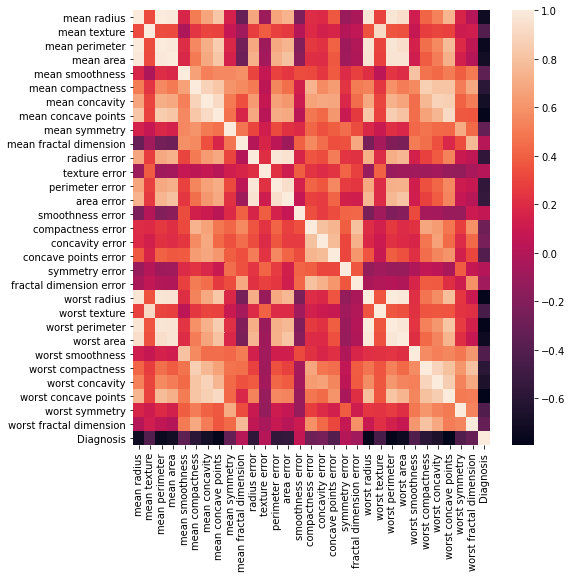

In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(corr);

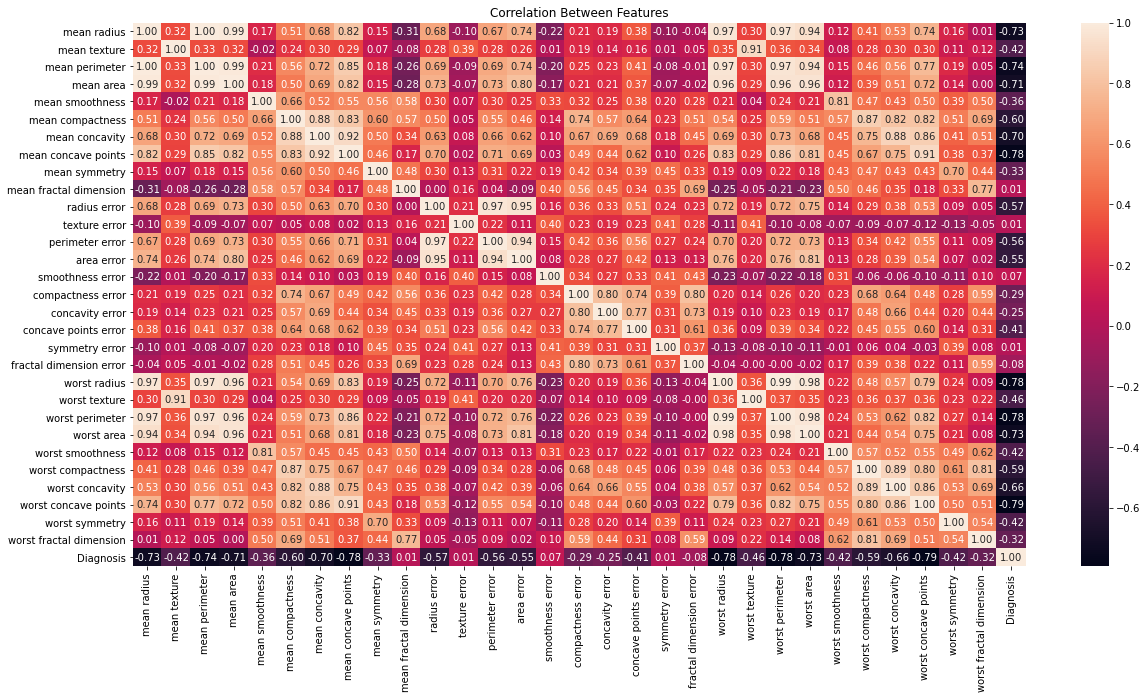

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot= True, fmt =".2f")
plt.title("Correlation Between Features")
plt.show()

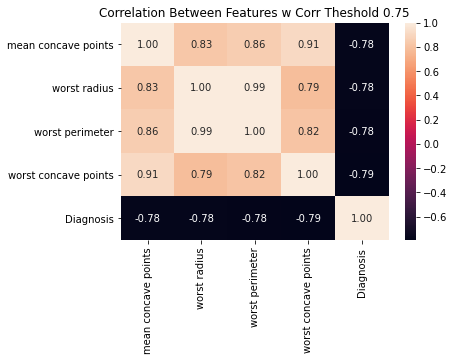

In [16]:
threshold = 0.75 
filtre = np.abs(corr["Diagnosis"]) > threshold 
corr_features = corr.columns[filtre].tolist()
sns.heatmap(bcdf[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Theshold 0.75")
plt.show()

In [17]:
#Initially complete dataset split into 2,the training set size=20% and the rest are test size =0.80
x_train, x_test, y_train, y_test = train_test_split(bcdf.iloc[:,1:30], bcdf['Diagnosis'],test_size = 0.8 )
print('x_train: ',(x_train.shape))
print('y_train: ',(y_train.shape))
print('x_test:  ',(x_test.shape))
print('y_test:  ',(y_test.shape))
print("Training Proper Size:", len(x_train))
print("Test Set Size:",len(x_test))

x_train:  (113, 29)
y_train:  (113,)
x_test:   (456, 29)
y_test:   (456,)
Training Proper Size: 113
Test Set Size: 456


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print (x_train)
print (x_test)


[[-1.25665365  0.24107118  0.15860141 ... -0.46369635 -0.60416786
  -0.94803248]
 [ 0.56479932  0.91228946  0.78276503 ...  0.59154333  0.43909815
  -0.54155105]
 [-1.23419178 -0.35320745 -0.38886414 ...  0.03732706 -0.79303498
   0.06364204]
 ...
 [-0.06617486 -0.69863442 -0.64038092 ... -0.68865169  0.38153865
  -0.08864696]
 [ 0.98953275 -0.91142063 -0.76759393 ... -1.19383543  0.42470827
  -0.46116058]
 [ 0.76083014 -0.99316901 -0.84006038 ... -1.21448853 -1.07183882
  -0.94180505]]
[[-0.19277809 -0.36162273 -0.33861368 ... -0.93396297 -1.5035351
  -1.28601216]
 [-1.83453615  1.24890042  0.92346632 ...  2.26459301  3.19835686
   1.95281825]
 [-0.13968641 -0.1163776  -0.21378095 ...  0.22899971  0.04697403
   0.33425224]
 ...
 [-1.1647642   0.1064268   0.01842907 ... -0.31392423 -0.35414376
  -0.78838378]
 [ 0.26666913  1.72576595  1.71160513 ...  0.71783927  0.71430453
  -1.16316192]
 [ 1.73281625  0.03670024 -0.07387309 ... -0.45760442 -1.67801235
  -0.36491846]]


In [19]:
#Implementing SVM model
from sklearn import metrics
svc_mode1 = SVC()
svc_mode1.fit(x_train, y_train)
y_pred = svc_mode1.predict(x_test)
print("Accuracy of SVM :",metrics.accuracy_score(y_test,y_pred))

Accuracy of SVM : 0.9276315789473685


In [32]:
#define a commom function to perform three modes
def set_p_value(x_train, x_test, y_train, y_test, smooth,mode=1):
    p_values=np.zeros((len(x_test),len(set(y_train)))) #Initialize variables
    on_x_train=x_train.copy()
    on_y_train=y_train.copy()
    on_x_cal=[]
    on_y_cal=[]
    ncs_cal=[]
    svc_mode1=SVC() #Create svmmodel
    svc_mode1.fit(on_x_train,on_y_train)
    for i in range(len(x_test)):
        dec=svc_mode1.decision_function([x_test[i]])
        if len(on_x_cal)==0:
            #For the first sample set p-values to 1 for every label
            p_values[i]=np.ones(len(set(y_train)))
            on_x_cal=x_test[i].reshape(1,len(x_test[0]))
            on_y_cal=y_test[i]  
        else:
            for j in range(len(set(y_train))):
                try:
                    con_score=np.append(ncs_cal,(-1*dec[0][j]))
                except IndexError:
                    continue
                #Calculate p-values of test sample
                if smooth == False:
                    p_values[i][j]=np.mean(con_score>=con_score[-1])
                else:
                    tau=np.random.uniform()
                    p_values[i][j]=(np.sum(con_score>con_score[-1])+(tau*(np.sum(con_score==con_score[-1]))))/len(con_score)
            on_x_cal=np.row_stack((on_x_cal,x_test[i]))
            try:
                on_y_cal=np.append(on_y_cal,y_test[i])
            except  KeyError :
                continue
        try:    
            ncs_cal=np.append(ncs_cal,-1*dec[0][y_test[i]])
            
        except IndexError:
            continue
        if len(on_x_cal) > 100:
            if mode == 2 :
                #If the size of the calibration set is greater than 100, add all samples to the training set
                on_x_train=np.row_stack((on_x_train,on_x_cal))
                on_y_train=np.append(on_y_train,on_y_cal)
                on_x_cal=[]
                on_y_cal=[]
                ncs_cal=[]
                #Re-fit the SVM on new training set
                svc_mode1.fit(on_x_train,on_y_train)
            if  mode == 3 :
                #If calibration set size is greater than 100, tranfer 80 samples to training set and leave 200 in calibration set
                on_x_train=np.row_stack((on_x_train,on_x_cal[:len(on_x_cal)-20]))
                on_y_train=np.append(on_y_train,on_y_cal[:len(on_y_cal)-20])
                on_x_cal=on_x_cal[len(on_x_cal)-20:]
                on_y_cal=on_y_cal[len(on_y_cal)-20:]
                #Re-fit SVM to new training set
                svc_mode1.fit(on_x_train,on_y_train)
                #Re-calculate calibration set scores
                dec_cal=svc_mode1.decision_function(on_x_cal)
                row=np.arange(0,len(dec_cal))
                score_cal=-1*dec_cal[row,on_y_cal]
    return p_values,x_test,y_test

In [33]:
def error_multiple_empty(x_test,y_test,significance_level,p_values):
    error=0
    multiple=0
    empty=0
    error_array=np.zeros(len(x_test))
    multiple_array=np.zeros(len(x_test))
    empty_array=np.zeros(len(x_test))
    prediction_set=[0] * len(x_test)
    for i in range(len(x_test)):
        prediction_set[i]=list(np.where(p_values[i]>(significance_level))[0])
        try:
            if y_test[i] not in prediction_set[i]:
                error+=1
            if len(prediction_set[i]) > 1:
                multiple+=1
            if len(prediction_set[i]) ==0:
                empty+=1
        except  KeyError :
            empty+=1
        error_array[i]=error
        multiple_array[i]=multiple
        empty_array[i]=empty 
    plt.plot(range(len(x_test)),error_array)
    plt.plot(range(len(x_test)),multiple_array)
    plt.plot(range(len(x_test)),empty_array)

Text(0.5, 1.0, 'Online SVM Inductive - Significance Level= 20%')

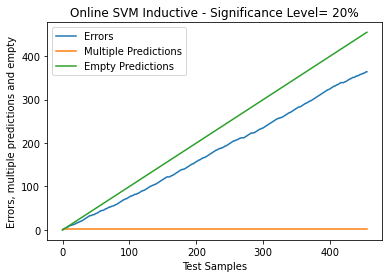

In [34]:
p_values,x_test, y_test = set_p_value(x_train, x_test, y_train, y_test,False)
significance_level=0.20
error_multiple_empty(x_test,y_test,significance_level,p_values)
plt.xlabel("Test Samples")
plt.ylabel("Errors, multiple predictions and empty")
plt.legend(["Errors","Multiple Predictions","Empty Predictions"])
plt.title("Online SVM Inductive Phase l - Significance Level= 20%")

Text(0.5, 1.0, 'Online SVM Inductive - Significance Level= 20%')

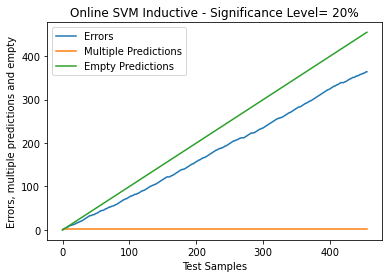

In [35]:
p_values,x_test, y_test = set_p_value(x_train, x_test, y_train, y_test,True)
significance_level=0.20
error_multiple_empty(x_test,y_test,significance_level,p_values)
plt.xlabel("Test Samples")
plt.ylabel("Errors, multiple predictions and empty")
plt.legend(["Errors","Multiple Predictions","Empty Predictions"])
plt.title("Online SVM Inductive Phase l - Significance Level= 0.20")

Text(0.5, 1.0, 'Online SVM Inductive  - Significance Level= 1%')

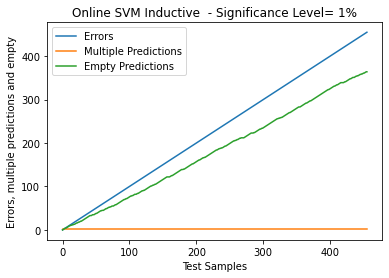

In [26]:
p_values,x_test, y_test = set_p_value(x_train, x_test, y_train, y_test,False,2)
significance_level=0.20
error_multiple_empty(x_test,y_test,significance_level,p_values)
plt.xlabel("Test Samples")
plt.ylabel("Errors, multiple predictions and empty")
plt.legend(["Errors","Multiple Predictions","Empty Predictions"])
plt.title("Online SVM Inductive 2Phase 2- Significance Level= 0.20")

Text(0.5, 1.0, 'Online SVM Inductive  - Significance Level= 1%')

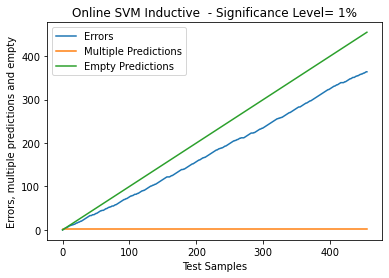

In [43]:
p_values,x_test, y_test = set_p_value(x_train, x_test, y_train, y_test,True,2)
significance_level=0.20
error_multiple_empty(x_test,y_test,significance_level,p_values)
plt.xlabel("Test Samples")
plt.ylabel("Errors, multiple predictions and empty")
plt.legend(["Errors","Multiple Predictions","Empty Predictions"])
plt.title("Online SVM Inductive Phase 2 - Significance Level= 0.20")

Text(0.5, 1.0, 'Online SVM Inductive  - Significance Level= 1%')

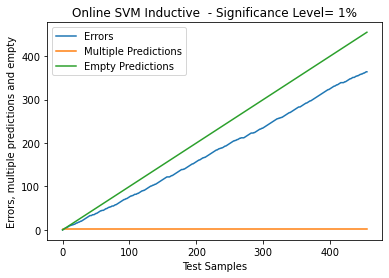

In [40]:
p_values,x_test, y_test = set_p_value(x_train, x_test, y_train, y_test,False,3)
significance_level=0.20
error_multiple_empty(x_test,y_test,significance_level,p_values)
plt.xlabel("Test Samples")
plt.ylabel("Errors, multiple predictions and empty")
plt.legend(["Errors","Multiple Predictions","Empty Predictions"])
plt.title("Online SVM Inductive Phase 3  - Significance Level= 0.20")

Text(0.5, 1.0, 'Online SVM Inductive Mode 3 - Significance Level= 0.20')

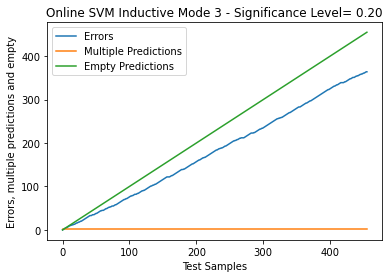

In [42]:
p_values,x_test, y_test = set_p_value(x_train, x_test, y_train, y_test,True,3)
significance_level=0.20
error_multiple_empty(x_test,y_test,significance_level,p_values)
plt.xlabel("Test Samples")
plt.ylabel("Errors, multiple predictions and empty")
plt.legend(["Errors","Multiple Predictions","Empty Predictions"])
plt.title("Online SVM Inductive Mode 3 - Significance Level= 0.20")